In [1]:
import sys
!$sys.executable -m pip install "yahoofinancials"
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sns.set_theme()
import yahoofinance_data_grabber as yhf

In [3]:
df_clean = pd.read_csv("datasets/covid_19_clean_complete.csv")
df_daywise = pd.read_csv("datasets/day_wise.csv")
df_country = pd.read_csv("datasets/country_wise_latest.csv")
index_list = ['^GSPC', '^VIX', '^N225', '000001.SS', '^KS11', '^STOXX50E']
data_list = yhf.grab_index_data(index_list)

In [4]:
SnP_500 = data_list[0]
VIX = data_list[1]
Nikkei = data_list[2]
Shanghai_SSE = data_list[3]
Korean_KOSPI = data_list[4]
STOXX50E = data_list[5]

In [5]:
covid_US = df_clean[df_clean['Country/Region'] == "US"]
SnP_500_merged = SnP_500.merge(covid_US, right_on = "Date", left_on = "formatted_date", how = "right")
snp_500_merged_dropna = SnP_500_merged.dropna(subset = ['close'])

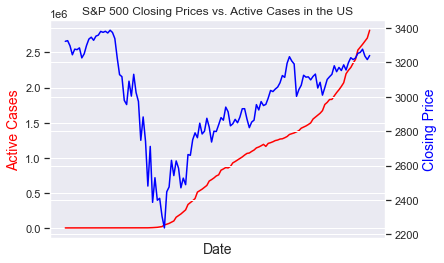

In [6]:
fig,ax = plt.subplots()
ax.plot(snp_500_merged_dropna.Date, snp_500_merged_dropna.Active, color="red")
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Active Cases",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot(snp_500_merged_dropna.Date, snp_500_merged_dropna.close,color="blue")
ax2.set_ylabel("Closing Price",color="blue",fontsize=14)
plt.xticks([])
plt.title("S&P 500 Closing Prices vs. Active Cases in the US")
plt.show()

In [7]:
covid_japan = df_clean[df_clean['Country/Region'] == "Japan"]
Nikkei_merged = Nikkei.merge(covid_japan, right_on = "Date", left_on = "formatted_date", how = "right")
Nikkei_merged_dropna = Nikkei_merged.dropna(subset = ['close'])

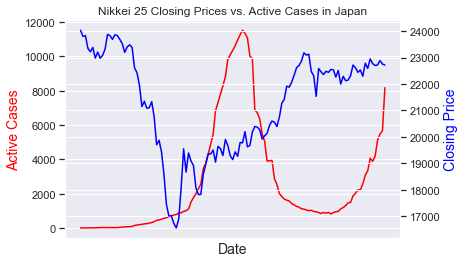

In [8]:
fig,ax = plt.subplots()
ax.plot(Nikkei_merged_dropna.Date, Nikkei_merged_dropna.Active, color="red")
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Active Cases",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot(Nikkei_merged_dropna.Date, Nikkei_merged_dropna.close,color="blue")
ax2.set_ylabel("Closing Price",color="blue",fontsize=14)
plt.xticks([])
plt.title("Nikkei 25 Closing Prices vs. Active Cases in Japan")
plt.show()

In [9]:
covid_china = df_clean[df_clean['Country/Region'] == "China"]
covid_china_grouped = covid_china.groupby(by = ['Date'], as_index = False).sum()
Shanghai_SSE_merged = Shanghai_SSE.merge(covid_china_grouped, right_on = "Date", left_on = "formatted_date", how = "right")
Shanghai_SSE_merged_dropna = Shanghai_SSE_merged.dropna(subset = ['close'])

,high,low,open,close,volume,adjclose,Date,Lat,Long,Confirmed,Deaths,Recovered,Active
0,3069.252930,3006.268066,3038.487061,3060.754883,223900.0,3060.754883,2020-01-22,1085.2923,3688.9377,548,17,28,503
1,3045.041016,2955.345947,3037.951904,2976.528076,272800.0,2976.528076,2020-01-23,1085.2923,3688.9377,643,18,30,595
12,2766.576904,2716.697998,2716.697998,2746.605957,215900.0,2746.605957,2020-02-03,1085.2923,3688.9377,19716,425,595,18696
13,2786.164062,2685.269043,2685.269043,2783.288086,364000.0,2783.288086,2020-02-04,1085.2923,3688.9377,23707,491,812,22404
14,2842.742920,2778.864014,2792.371094,2818.087891,309800.0,2818.087891,2020-02-05,1085.2923,3688.9377,27440,563,1062,25815
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,3336.678955,3300.572021,3330.547119,3320.895020,359300.0,3320.895020,2020-07-21,1085.2923,3688.9377,85708,4648,78608,2452
182,3381.976074,3311.785889,3315.181885,3333.164062,393300.0,3333.164062,2020-07-22,1085.2923,3688.9377,85906,4648,78648,2610
183,3336.300049,3257.826904,3306.148926,3325.110107,407000.0,3325.110107,2020-07-23,1085.2923,3688.9377,86045,4649,78701,2695
184,3319.126953,3184.965088,3310.645020,3196.768066,427100.0,3196.768066,2020-07-24,1085.2923,3688.9377,86202,4650,78745,2807


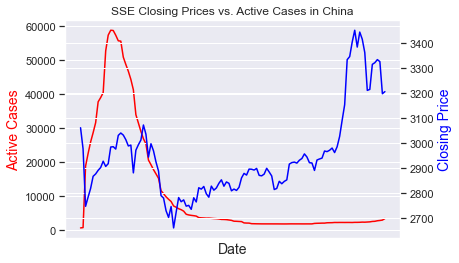

In [10]:
fig,ax = plt.subplots()
ax.plot(Shanghai_SSE_merged_dropna.Date, Shanghai_SSE_merged_dropna.Active, color="red")
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Active Cases",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot(Shanghai_SSE_merged_dropna.Date, Shanghai_SSE_merged_dropna.close,color="blue")
ax2.set_ylabel("Closing Price",color="blue",fontsize=14)
plt.xticks([])
plt.title("SSE Closing Prices vs. Active Cases in China")
plt.show()

In [11]:
covid_korea = df_clean[df_clean['Country/Region'] == "South Korea"]
Korean_KOSPI_merged = Korean_KOSPI.merge(covid_korea, right_on = "Date", left_on = "formatted_date", how = "right")
Korean_KOSPI_merged_dropna = Korean_KOSPI_merged.dropna(subset = ['close'])

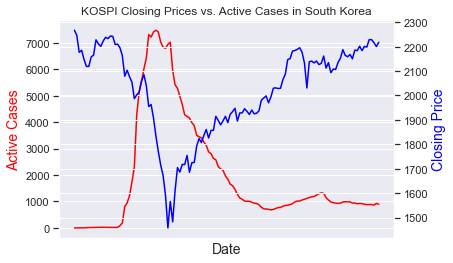

In [12]:
fig,ax = plt.subplots()
ax.plot(Korean_KOSPI_merged_dropna.Date, Korean_KOSPI_merged_dropna.Active, color="red")
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Active Cases",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot(Korean_KOSPI_merged_dropna.Date, Korean_KOSPI_merged_dropna.close,color="blue")
ax2.set_ylabel("Closing Price",color="blue",fontsize=14)
plt.xticks([])
plt.title("KOSPI Closing Prices vs. Active Cases in South Korea")
plt.show()

In [13]:
eurozone = ['Austria', 'Belgium', 'Finland', 'France', 'Germany', 'Greece', 'Ireland', 'Italy', 'Luxembourg', 'Netherlands', 'Portugal', 'Spain']
covid_euro = df_clean[df_clean['Country/Region'].isin(eurozone)]
covid_euro_grouped = covid_euro.groupby(by = ['Date'], as_index = False).sum()
STOXX50E_merged = STOXX50E.merge(covid_euro_grouped, right_on = "Date", left_on = "formatted_date", how = "right")
STOXX50E_merged_dropna = STOXX50E_merged.dropna(subset = ['close'])

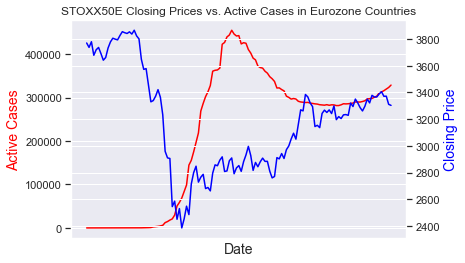

In [14]:
fig,ax = plt.subplots()
ax.plot(STOXX50E_merged_dropna.Date, STOXX50E_merged_dropna.Active, color="red")
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Active Cases",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot(STOXX50E_merged_dropna.Date, STOXX50E_merged_dropna.close,color="blue")
ax2.set_ylabel("Closing Price",color="blue",fontsize=14)
plt.xticks([])
plt.title("STOXX50E Closing Prices vs. Active Cases in Eurozone Countries")
plt.show()